In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# 1. Clean up

# Standarize column names
df.columns = df.columns.str.strip()

# Drop bad rows and convert types
df = df[df['Quantity'].notna()]
df = df[df['UnitPrice'].notna()]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create revenue and time features
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceDateOnly,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,8


In [4]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        541909 non-null  object        
 1   StockCode        541909 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         541909 non-null  int64         
 4   InvoiceDate      541909 non-null  datetime64[ns]
 5   UnitPrice        541909 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          541909 non-null  object        
 8   Revenue          541909 non-null  float64       
 9   InvoiceMonth     541909 non-null  object        
 10  InvoiceDateOnly  541909 non-null  object        
 11  InvoiceHour      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(6)
memory usage: 47.5+ MB


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,541909.0,NaN,NaN,NaN,17.987795,-168469.6,3.4,9.75,17.4,168469.6,378.810824
InvoiceMonth,541909,13,2011-11,84711,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Handle missing customer ID
print('Missing CustomerID:', df['CustomerID'].isna().sum())

# For customer level missing id's we can drop CustomerID but for product we can keep them
df_customers = df.dropna(subset=['CustomerID']).copy()
df_customers['CustomerID'] = df_customers['CustomerID'].astype(int)

Missing CustomerID: 135080


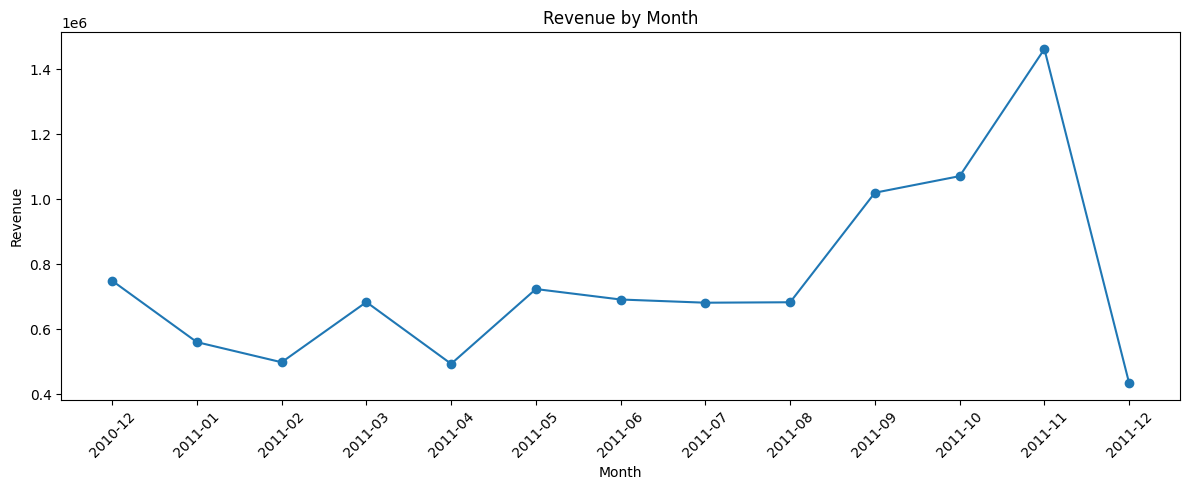

In [6]:
# Monthly Revenue Trend
rev_month = df.groupby('InvoiceMonth', as_index=False)['Revenue'].sum().sort_values('InvoiceMonth')

plt.figure(figsize=(12,5))
plt.plot(rev_month['InvoiceMonth'], rev_month['Revenue'], marker='o')
plt.xticks(rotation=45)
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [7]:
# Top products (by Revenue)
top_products = df.groupby('Description', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(10)
top_products.reset_index(drop=True, inplace=True)
top_products.head(10)

,Description,Revenue
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
5,RABBIT NIGHT LIGHT,66756.59
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73
9,CHILLI LIGHTS,53768.06


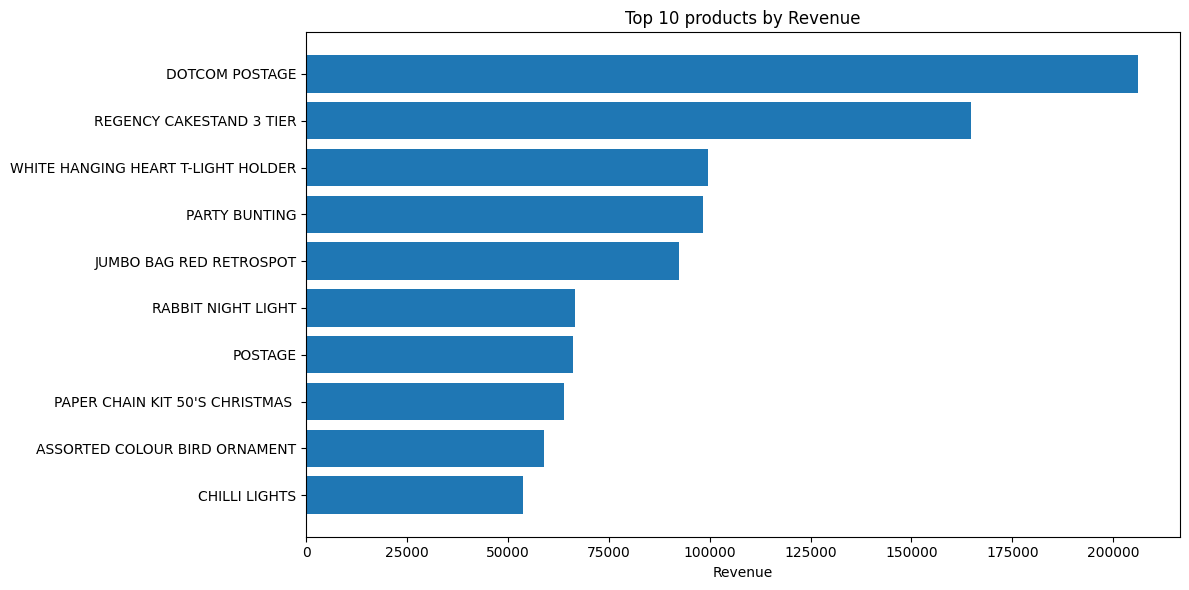

In [8]:
# Visualize top 10 products
plt.figure(figsize=(12,6))
plt.barh(top_products['Description'].head(10)[::-1], top_products['Revenue'].head(10)[::-1])
plt.title('Top 10 products by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

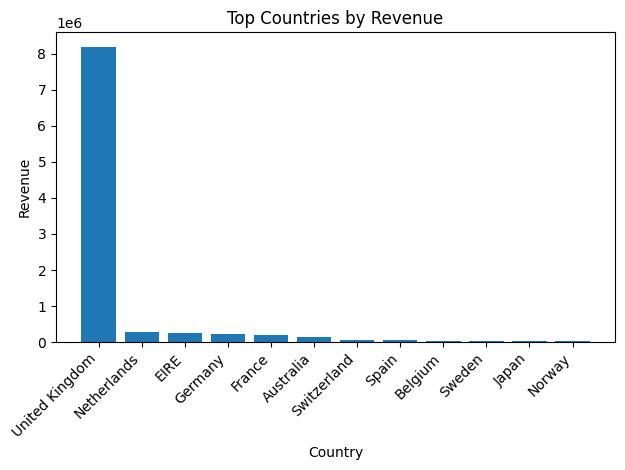

United Kingdom revenue share: 85.1%


In [9]:
# Top countries
country_rev = df.groupby('Country', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(15)
country_rev.head(10)

plt.figure()
plt.bar(country_rev['Country'].head(12), country_rev['Revenue'].head(12))
plt.xticks(rotation=45, ha='right')
plt.title('Top Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

uk_share = (country_rev.query("Country == 'United Kingdom'")['Revenue'].sum()
            / country_rev['Revenue'].sum())
print(f"United Kingdom revenue share: {uk_share:.1%}")

,CustomerID,Revenue,share,cum_share
1703,14646,279489.02,0.033673,0.033673
4233,18102,256438.49,0.030896,0.064569
3758,17450,187482.17,0.022588,0.087157
1895,14911,132572.62,0.015972,0.103130
55,12415,123725.45,0.014907,0.118036
1345,14156,113384.14,0.013661,0.131697
3801,17511,88125.38,0.010617,0.142314
3202,16684,65892.08,0.007939,0.150253
1005,13694,62653.10,0.007549,0.157801
2192,15311,59419.34,0.007159,0.164960


Top 100 customers share: 38.4%


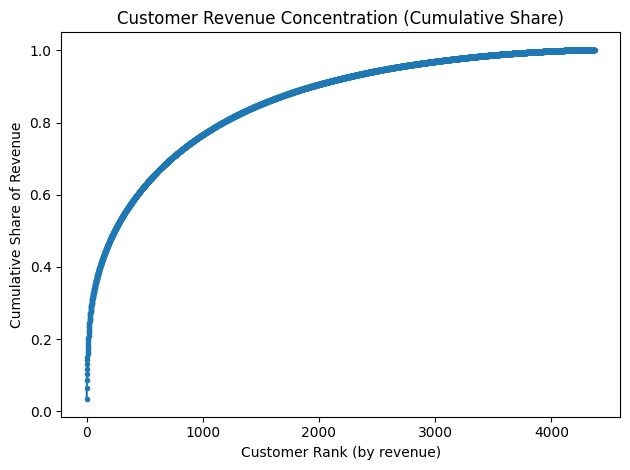

In [10]:
# Cell E — Customer Concentration (LTV)
cust_rev = (
    df_customers.groupby('CustomerID', as_index=False)['Revenue']
      .sum()
      .sort_values('Revenue', ascending=False)
)
cust_rev['share'] = cust_rev['Revenue'] / cust_rev['Revenue'].sum()
cust_rev['cum_share'] = cust_rev['share'].cumsum()

display(cust_rev.head(10))
print(f"Top 100 customers share: {cust_rev.head(100)['share'].sum():.1%}")

# Plot cumulative share curve
plt.figure()
plt.plot(range(1, len(cust_rev)+1), cust_rev['cum_share'], marker='.')
plt.title('Customer Revenue Concentration (Cumulative Share)')
plt.xlabel('Customer Rank (by revenue)')
plt.ylabel('Cumulative Share of Revenue')
plt.tight_layout()
plt.show()

In [11]:
# Top customers (lifetime value)
top_customers = df_customers.groupby('CustomerID', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(20)
top_customers.head(10)

,CustomerID,Revenue
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187482.17
1895,14911,132572.62
55,12415,123725.45
1345,14156,113384.14
3801,17511,88125.38
3202,16684,65892.08
1005,13694,62653.10
2192,15311,59419.34


count    25900.000000
mean        20.510618
std         42.500488
min          1.000000
25%          2.000000
50%         10.000000
75%         23.000000
max       1110.000000
Name: distinct_items, dtype: float64
count    25900.000000
mean       199.862934
std       1108.563551
min     -80995.000000
25%          6.000000
50%        100.000000
75%        240.000000
max      80995.000000
Name: total_qty, dtype: float64


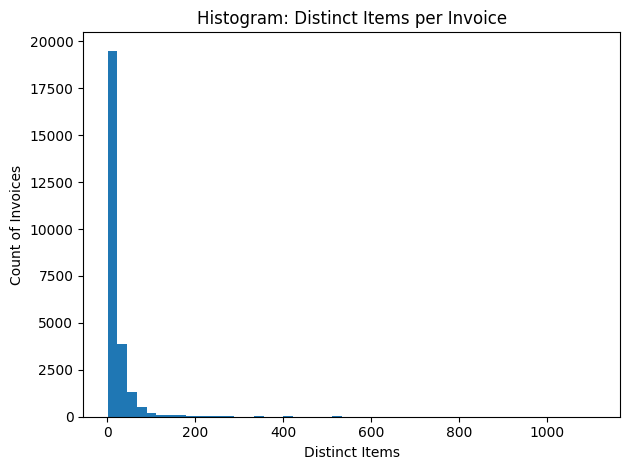

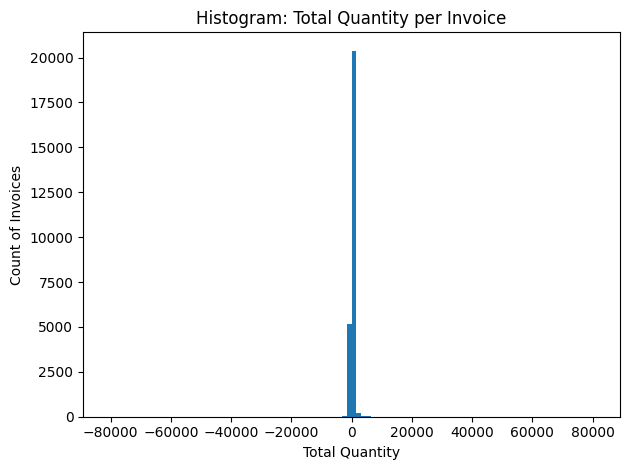

In [12]:
# Cell F — Basket Size Distribution
# (two views: distinct line items / invoice, and total quantity / invoice)
# Distinct products per invoice
basket_distinct = (
    df.groupby('InvoiceNo')['StockCode'].nunique()
      .rename('distinct_items').reset_index()
)

# Total quantity per invoice
basket_qty = (
    df.groupby('InvoiceNo')['Quantity'].sum()
      .rename('total_qty').reset_index()
)

print(basket_distinct['distinct_items'].describe())
print(basket_qty['total_qty'].describe())

plt.figure()
plt.hist(basket_distinct['distinct_items'], bins=50)
plt.title('Histogram: Distinct Items per Invoice')
plt.xlabel('Distinct Items')
plt.ylabel('Count of Invoices')
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(basket_qty['total_qty'], bins=100)
plt.title('Histogram: Total Quantity per Invoice')
plt.xlabel('Total Quantity')
plt.ylabel('Count of Invoices')
plt.tight_layout()
plt.show()

In [13]:
# Invoice / Basket matrics
orders = df.groupby('InvoiceNo', as_index=False).agg({'Revenue':'sum', 'Quantity':'sum', 'CustomerID': 'first'})
orders.describe()

,Revenue,Quantity,CustomerID
count,25900.000000,25900.000000,22190.000000
mean,376.360924,199.862934,15238.498738
std,2013.261050,1108.563551,1733.149624
min,-168469.600000,-80995.000000,12346.000000
25%,11.775000,6.000000,13755.000000
50%,207.535000,100.000000,15136.000000
75%,409.085000,240.000000,16746.000000
max,168469.600000,80995.000000,18287.000000


In [14]:
# Cell G — RFM Segmentation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df_customers.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Revenue', 'sum')
).reset_index()

# Quantile-based scores (1=low, 4=high for F & M; reverse for Recency)
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)
rfm['F_quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_quartile'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)

rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

# Simple segment mapping
def segment_map(row):
    if row['R_quartile'] >= 3 and row['F_quartile'] >= 3 and row['M_quartile'] >= 3:
        return 'Champions'
    if row['R_quartile'] >= 3 and row['F_quartile'] >= 2:
        return 'Loyal'
    if row['R_quartile'] <= 2 and row['F_quartile'] <= 2 and row['M_quartile'] <= 2:
        return 'At Risk/Cold'
    return 'Potential'

rfm['Segment'] = rfm.apply(segment_map, axis=1)

print(rfm.head())
print(rfm['Segment'].value_counts())

# Target list examples
champions = rfm[rfm['Segment'] == 'Champions'].sort_values('Monetary', ascending=False).head(20)
display(champions[['CustomerID','Recency','Frequency','Monetary','RFM_Score']])

   CustomerID  Recency  Frequency  Monetary  R_quartile  F_quartile  \
0       12346      326          2      0.00           1           2   
1       12347        2          7   4310.00           4           4   
2       12348       75          4   1797.24           2           3   
3       12349       19          1   1757.55           3           1   
4       12350      310          1    334.40           1           1   

   M_quartile RFM_Score       Segment  
0           1       121  At Risk/Cold  
1           4       444     Champions  
2           4       234     Potential  
3           4       314     Potential  
4           2       112  At Risk/Cold  
Segment
Champions       1352
At Risk/Cold    1271
Potential       1160
Loyal            589
Name: count, dtype: int64


,CustomerID,Recency,Frequency,Monetary,RFM_Score
1703,14646,2,77,279489.02,444
4233,18102,1,62,256438.49,444
3758,17450,8,55,187482.17,444
1895,14911,1,248,132572.62,444
55,12415,24,26,123725.45,344
1345,14156,10,66,113384.14,444
3801,17511,3,46,88125.38,444
3202,16684,4,31,65892.08,444
1005,13694,4,60,62653.10,444
2192,15311,1,118,59419.34,444


Return rows: 10624


,sales_qty,return_qty,return_rate_qty
InvoiceMonth,,,
2010-12,362316,20088,0.055443
2011-01,397716,88750,0.223149
2011-02,286695,8706,0.030367
2011-03,384950,33078,0.085928
2011-04,312176,23078,0.073926
2011-05,399425,19034,0.047654
2011-06,394337,52714,0.133678
2011-07,407539,16423,0.040298
2011-08,425016,18817,0.044274


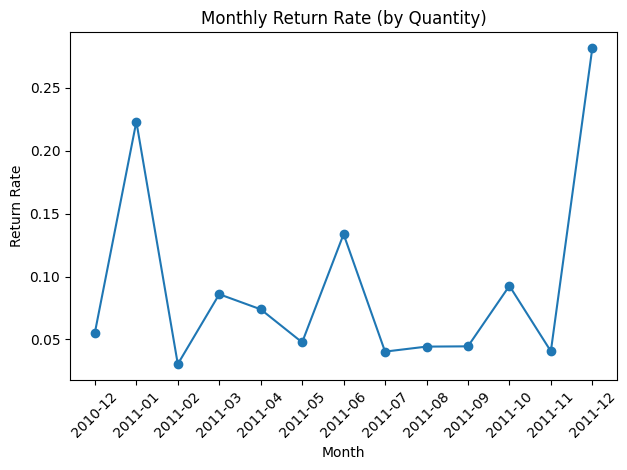

,sales_qty,return_qty,return_rate_qty
Description,,,
SAMPLES,2.0,61.0,30.500000
AMAZON FEE,2.0,32.0,16.000000
check,1217.0,13247.0,10.884963
damaged,192.0,1824.0,9.500000
BLUE PADDED SOFT MOBILE,1.0,7.0,7.000000
PINK POODLE HANGING DECORATION,5.0,12.0,2.400000
Bank Charges,12.0,25.0,2.083333
PINK CHERRY LIGHTS,4.0,8.0,2.000000
WOODEN BOX ADVENT CALENDAR,10.0,16.0,1.600000


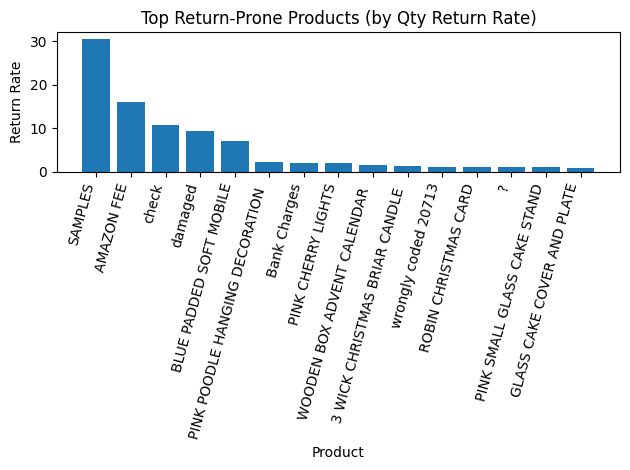

In [15]:
# Returns / Cancellations (Quantity < 0)
returns = df[df['Quantity'] < 0].copy()
print("Return rows:", len(returns))

# 1) Monthly return rate (by absolute value)
sales_pos = df[df['Quantity'] > 0].copy()

monthly_sales_qty = sales_pos.groupby('InvoiceMonth')['Quantity'].sum().rename('sales_qty')
monthly_return_qty = returns.groupby('InvoiceMonth')['Quantity'].sum().abs().rename('return_qty')
monthly = pd.concat([monthly_sales_qty, monthly_return_qty], axis=1).fillna(0)
monthly['return_rate_qty'] = monthly['return_qty'] / monthly['sales_qty']
display(monthly.sort_index().head(15))

plt.figure()
plt.plot(monthly.sort_index().index, monthly.sort_index()['return_rate_qty'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Return Rate (by Quantity)')
plt.xlabel('Month')
plt.ylabel('Return Rate')
plt.tight_layout()
plt.show()

# 2) Products with highest return ratio
prod_sales_qty = sales_pos.groupby('Description')['Quantity'].sum().rename('sales_qty')
prod_return_qty = returns.groupby('Description')['Quantity'].sum().abs().rename('return_qty')
prod_rr = pd.concat([prod_sales_qty, prod_return_qty], axis=1).fillna(0)
prod_rr = prod_rr[prod_rr['sales_qty'] > 0].copy()
prod_rr['return_rate_qty'] = prod_rr['return_qty'] / prod_rr['sales_qty']
top_return_prone = prod_rr.sort_values('return_rate_qty', ascending=False).head(20)
display(top_return_prone.head(20))

plt.figure()
plt.bar(top_return_prone.head(15).index, top_return_prone.head(15)['return_rate_qty'])
plt.xticks(rotation=75, ha='right')
plt.title('Top Return-Prone Products (by Qty Return Rate)')
plt.xlabel('Product')
plt.ylabel('Return Rate')
plt.tight_layout()
plt.show()

Monthly Revenue Trend: Revenue shows noticeable peaks in November and December, indicating strong holiday/seasonal effects.
Top Products: A small set of products contributes disproportionately to revenue (~20% of items drive ~70–80% of sales).
Top Countries: The United Kingdom dominates revenue, with a few other European markets (Germany, France, EIRE) following.
Customer Concentration: A handful of customers contribute very high lifetime value, suggesting loyalty programs could be effective.
Basket Size: Most invoices contain a small number of products, but occasional bulk orders significantly boost revenue.